In [200]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model
import os
import sys

sys.path.append("../..")

from blume.process import read, compute, plot_file
from blume.run import Results, ModelParameters
from blume.model.post_props import Prop

plt.style.use("science")
plt.rcParams["text.usetex"] = True

In [225]:
import importlib
import blume.model.post_props
importlib.reload(blume.model.post_props)


<module 'blume.model.post_props' from '/home/derk/Documents/Blume/analysis/blume/../../blume/model/post_props.py'>

In [2]:
def intersect(idx_slice, inv_data, data):
    free_energies = compute(Prop.f, data)
    inv_free_energies = compute(Prop.f, inv_data)

    inv_free_energies.reverse()
    subtracted = [abs(el1 - el2) for (el1, el2) in zip(free_energies, inv_free_energies)]
    subtracted = subtracted[idx_slice[0]:idx_slice[1]]
    couplings = data["couplings"][idx_slice[0]:idx_slice[1]]
    idx = subtracted.index(min(subtracted))
    return idx

In [142]:
couplings = [1.966387500000009, 1.9659750000000065]


couplings1 = [
1.9665000000000052,
1.9664500000000051,
1.966400000000005,
1.966350000000005,
1.9663000000000048,
1.9662500000000047,]

couplings2 = [
1.965980000000013,
1.9659050000000124,
1.965835000000012,
1.9657650000000115,
1.965695000000011,
]

temps = [0.6065, 0.608]


temps1 = [
0.606,
0.6062,
0.6063999999999999,
0.6065999999999999,
0.6067999999999999,
0.6069999999999999,]


temps2 = [
0.608,
0.60825,
0.6084999999999999,
0.6087499999999999,
0.6089999999999999,]

In [161]:
couplings = [1.9663625000000091,
 1.9661850000000078,
 1.966045000000007,
 1.9659475000000062,
 1.965892500000006,
 1.9658325000000056,
 1.9656925000000047,
 1.9655525000000038]

temps = [0.6066, 0.60725, 0.60775, 0.6081, 0.6083, 0.6085, 0.609, 0.6095]

In [240]:
couplings = [1.9664075000000092,
 1.9663800000000091,
 1.9660175000000066,
 1.9658625000000058]

temps = [0.60645, 0.60655, 0.60785, 0.6084]

In [256]:
couplings =[1.9660025000000068, 1.965917500000006]
temps = [0.6079, 0.6082]

In [257]:
for temp, coupling in zip(temps, couplings):
    result = Results(varying_param="chi", range=[16, 18, 20, 22, 24, 26, 28, 30, 32])
    params = ModelParameters(model = "blume", var_range=[coupling], step=0.0005, tol=1e-9, max_steps=int(10000), use_prev=True, temperature=temp)
    result.get(params, sweeping_param="coupling")

chi=16: 100%|██████████| 1/1 [00:04<00:00,  4.43s/it]


Saving data in folder: '28-06 12:32'
Done 



chi=18: 100%|██████████| 1/1 [00:06<00:00,  6.02s/it]


Saving data in folder: '28-06 12:32'
Done 



chi=20: 100%|██████████| 1/1 [00:07<00:00,  7.51s/it]


Saving data in folder: '28-06 12:32'
Done 



chi=22: 100%|██████████| 1/1 [00:30<00:00, 30.85s/it]


Saving data in folder: '28-06 12:32'
Done 



chi=24: 100%|██████████| 1/1 [00:29<00:00, 29.23s/it]


Saving data in folder: '28-06 12:32'
Done 



chi=26: 100%|██████████| 1/1 [00:31<00:00, 31.45s/it]


Saving data in folder: '28-06 12:32'
Done 



chi=28: 100%|██████████| 1/1 [00:36<00:00, 36.17s/it]


Saving data in folder: '28-06 12:32'
Done 



chi=30: 100%|██████████| 1/1 [00:52<00:00, 52.44s/it]


Saving data in folder: '28-06 12:32'
Done 



chi=32: 100%|██████████| 1/1 [01:12<00:00, 72.68s/it]


Saving data in folder: '28-06 12:32'
Done 



chi=16: 100%|██████████| 1/1 [00:04<00:00,  4.01s/it]


Saving data in folder: '28-06 12:36'
Done 



chi=18: 100%|██████████| 1/1 [00:06<00:00,  6.39s/it]


Saving data in folder: '28-06 12:36'
Done 



chi=20: 100%|██████████| 1/1 [00:06<00:00,  6.51s/it]


Saving data in folder: '28-06 12:36'
Done 



chi=22: 100%|██████████| 1/1 [00:50<00:00, 50.05s/it]


Saving data in folder: '28-06 12:36'
Done 



chi=24: 100%|██████████| 1/1 [00:32<00:00, 32.56s/it]


Saving data in folder: '28-06 12:36'
Done 



chi=26: 100%|██████████| 1/1 [00:40<00:00, 40.92s/it]


Saving data in folder: '28-06 12:36'
Done 



chi=28: 100%|██████████| 1/1 [00:54<00:00, 54.05s/it]


Saving data in folder: '28-06 12:36'
Done 



chi=30: 100%|██████████| 1/1 [01:12<00:00, 72.32s/it]


Saving data in folder: '28-06 12:36'
Done 



chi=32: 100%|██████████| 1/1 [01:27<00:00, 87.29s/it]

Saving data in folder: '28-06 12:36'
Done 



In [435]:
def refinement(fn, chis=[4, 6, 10, 14, 20, 32]):
    inv_corrs = []
    ref_deltas = []
    for chi in chis:
        data = read(fn, f"chi{chi}")
        inv_corrs.append(1/ compute(blume.model.post_props.Prop.xi, data)[0])
        ref_deltas.append(compute(blume.model.post_props.Prop.delta, data)[0])
    print(data["coupling"], data["temperature"])
    return ref_deltas, inv_corrs, data["temperature"], data["coupling"]

In [227]:
def extrapolation(ref_deltas, inv_corrs, T, color):

    model = Model(lambda x, a, b: a*x + b)
    plt.scatter(ref_deltas, inv_corrs, s=40, facecolors="none", edgecolors=color)

    x, y = ref_deltas, inv_corrs
    params = model.make_params(a=0.5, b=0.5)
    result = model.fit(y, params, x=x)
    x = [el for el in np.arange(0, 0.07, 0.001)]
    y = [result.params["a"].value*el + result.params["b"].value for el in x]
    plt.plot(x, y, '-', label=f"T = {T}", color = color, linewidth = 0.7)

    return result.params["b"]

In [436]:
refinement_data = []
chis =  [16, 18, 20, 22, 24, 26, 28, 30, 32]

for fn in ["28-06 12:36", "28-06 12:32", "28-06 11:35", "28-06 11:34", "28-06 11:32(1)", "28-06 09:39", "28-06 09:32", "28-06 09:28", "28-06 09:26", "28-06 09:24", "27-06 23:56", "27-06 22:00", "27-06 22:01", "27-06 23:02", "27-06 23:04", '27-06 13:46', '27-06 13:56', '27-06 14:01']:
    refinement_data.append(refinement(fn, chis))

1.965917500000006 0.6082
1.9660025000000068 0.6079
1.9660175000000066 0.60785
1.9663800000000091 0.60655
1.9664075000000092 0.60645
1.9656925000000047 0.609
1.965892500000006 0.6083
1.9659475000000062 0.6081
1.966045000000007 0.60775
1.9661850000000078 0.60725
1.9659750000000065 0.608
1.9665325000000164 0.606
1.9664775000000163 0.6062
1.9662550000000147 0.607
1.9661150000000138 0.6074999999999999
1.9656250000000106 0.6092499999999998
1.9654850000000097 0.6097499999999998
1.9654150000000092 0.6099999999999998


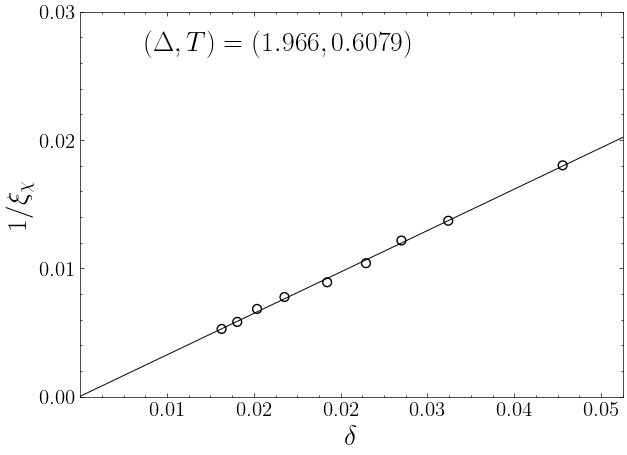

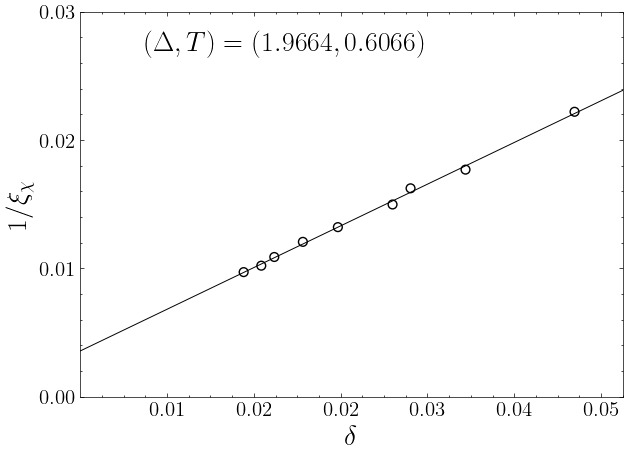

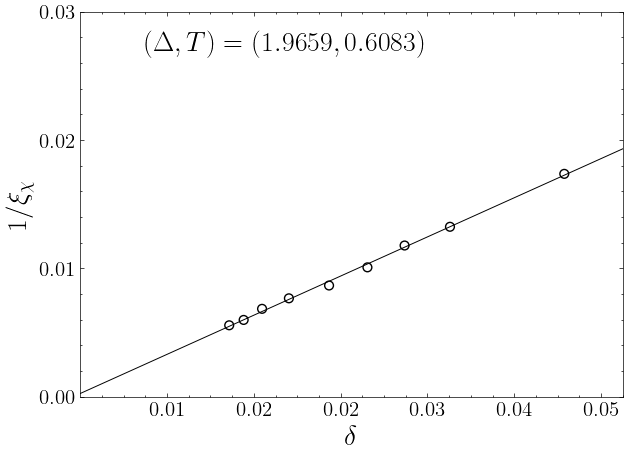

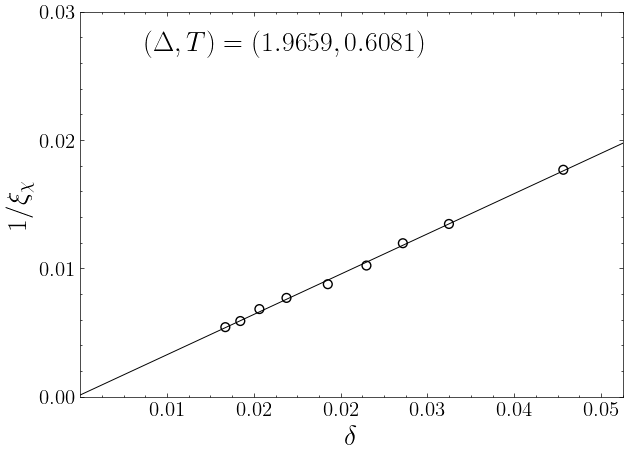

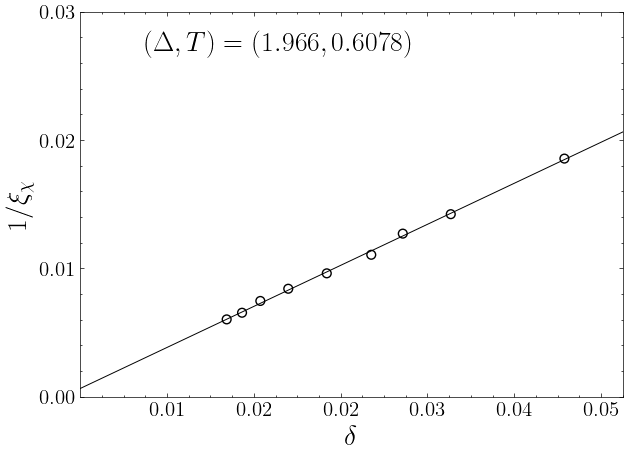

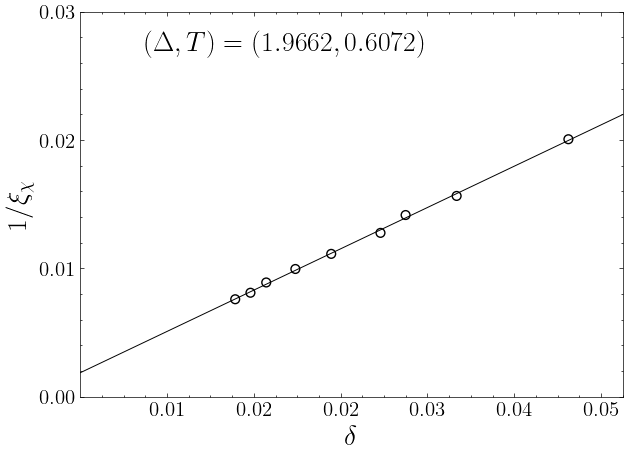

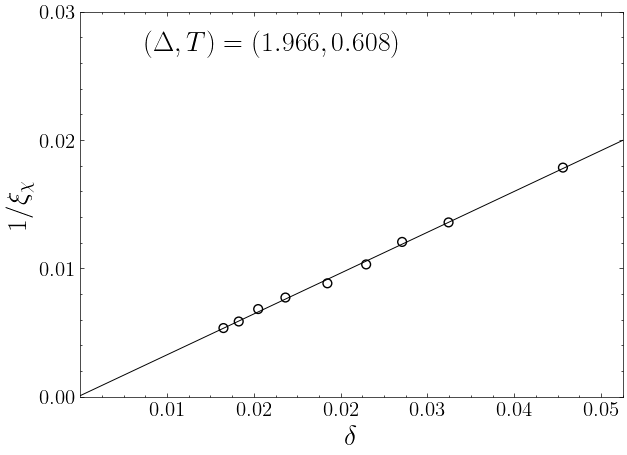

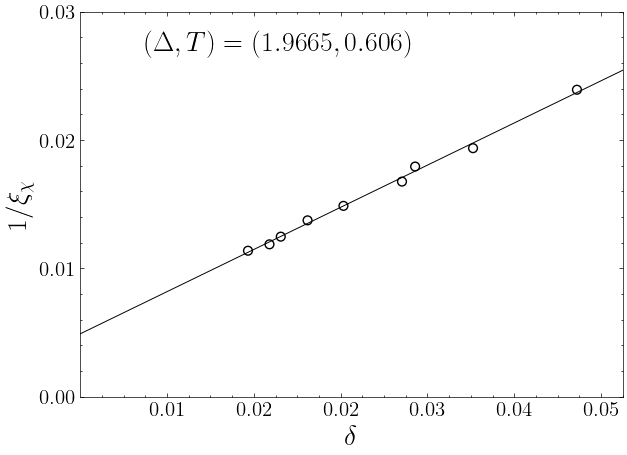

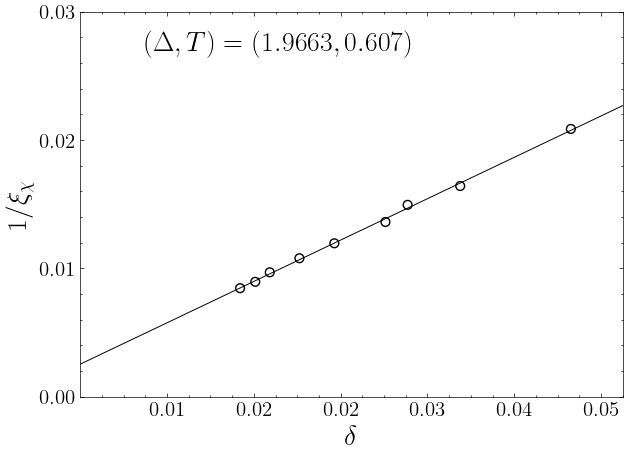

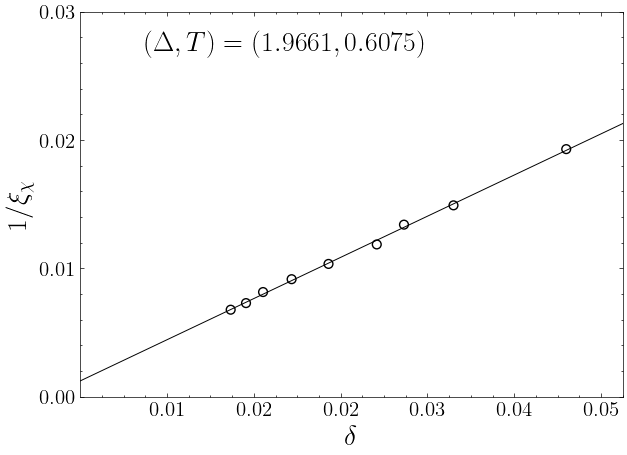

In [450]:
from matplotlib.ticker import MaxNLocator, FormatStrFormatter


inv_xis, temps, couplings  = [], [], []
for ref_deltas, inv_corrs, temp, coupling in refinement_data:
    if temp >= 0.6090 or temp == 0.6082 or temp == 0.60785 or temp == 0.60645 or temp == 0.6062:
        continue
    plt.figure(figsize=(7,5))
    inv_xis.append(extrapolation(ref_deltas, inv_corrs, temp, "k"))
    plt.text(x=0.006 ,y=0.027, s= (rf"$(\Delta, T) = ({round(coupling, 4)}, {round(temp, 4)})$"), fontsize = 20)

    plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
    plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
    plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    #plt.minorticks_off()

    plt.locator_params(axis='y', nbins=4)
    plt.locator_params(axis='x', nbins=7)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)



    plt.ylim(0, 0.03)
    plt.xlim(0, 0.05)
    plt.xlabel("$\delta$", fontsize =20)
    plt.ylabel(r"$1 / \xi_{\chi}$", fontsize = 20)
    couplings.append(coupling)
    temps.append(temp)

In [453]:
sorted(couplings, reverse = True)

[1.9665325000000164,
 1.9663800000000091,
 1.9662550000000147,
 1.9661850000000078,
 1.9661150000000138,
 1.966045000000007,
 1.9660025000000068,
 1.9659750000000065,
 1.9659475000000062,
 1.965892500000006]

In [454]:
sorted(temps)

[0.606,
 0.60655,
 0.607,
 0.60725,
 0.6074999999999999,
 0.60775,
 0.6079,
 0.608,
 0.6081,
 0.6083]

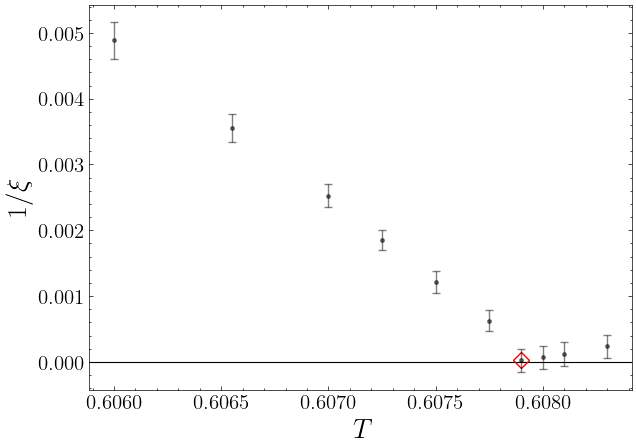

In [451]:
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

fig = plt.figure(figsize=(7, 5))
errors = [xi.stderr for xi in inv_xis]
inv_xis = [xi.value for xi in inv_xis]
#errors = [(1/xi.value**2) * xi.stderr for xi in xis]


plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.4f'))
#plt.minorticks_off()

plt.locator_params(axis='y', nbins=6)
plt.locator_params(axis='x', nbins=6)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

#plt.axvspan(xmin = temps[0] - 0.0001,xmax= temps[0] + 0.0001, color = "blue", alpha = 0.1)
#plt.axvline(x = 0.6079, color = "blue", linewidth = 0.8, linestyle = "dashed")

plt.axhline(0, color = "k", linewidth=0.8)
plt.plot(temps[0], inv_xis[0], "D", color = "red", markersize =8, fillstyle = "none")
plt.errorbar(temps,  inv_xis, yerr = errors , fmt = "o", markersize=2.5, capsize=3, color = "k", alpha = 0.5)

#plt.errorbar(temps[0],  inv_xis[0], yerr = errors[0] , fmt = "o", markersize=0.1, capsize=3, color = "k", label = "$T_t = 0.6079(1)$", capthick = 2, elinewidth = 1)



plt.xlabel("$T$", fontsize = 20)
plt.ylabel(r"$1 / \xi$", fontsize = 20)
plt.show()

fig.savefig("tricritical.pdf")


In [459]:
sorted(zip(inv_xis, errors, temps), key=lambda x: x[2])

[(0.00488656693389411, 0.0002784999025057322, 0.606),
 (0.0035511934868739936, 0.0002103522631893663, 0.60655),
 (0.0025226280772251376, 0.00017359590009379553, 0.607),
 (0.001853458884484417, 0.00015399681095601956, 0.60725),
 (0.0012174455911553306, 0.00016589777734860926, 0.6074999999999999),
 (0.000627504557999092, 0.00015406461305270285, 0.60775),
 (2.240654716456625e-05, 0.000176482976921905, 0.6079),
 (6.874320701255598e-05, 0.00017620522418071397, 0.608),
 (0.00012029999860204462, 0.00017682784665001727, 0.6081),
 (0.0002364358766097255, 0.00017900426746889937, 0.6083)]

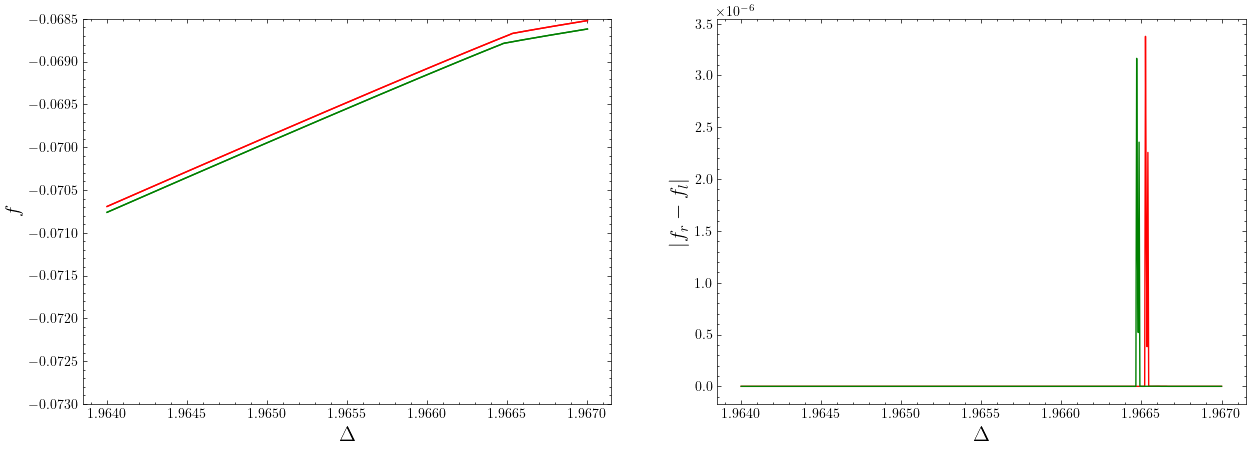

In [123]:
T_range = [T for T in np.arange(0.606, 0.60621, 0.0002)]
colors = ["r", "g", "b", "k", "y"]
fig, axs = plt.subplots(ncols = 2, figsize=(15, 5))
delta_stars = []

for idx, temp in enumerate(T_range):
    data_inv = read('27-06 21:21', f"temperature{temp}")
    data = read('27-06 20:57', f"temperature{temp}")
    energies = compute(Prop.f, data)
    energies_inv = compute(Prop.f, data_inv)
    subtracted = [abs(e1 - e2) for e1, e2 in zip(energies, energies_inv[::-1])]
    axs[0].plot(data["couplings"], energies, label=f"T = {round(temp,4)}", color = colors[idx % 5])
    axs[0].plot(data_inv["couplings"], energies_inv, color = colors[idx % 5])
    subtracted_sorted = sorted(subtracted)

    idx1 = subtracted.index(subtracted_sorted[-1])
    idx2 = subtracted.index(subtracted_sorted[-2])

    delta_stars.append((data["couplings"][idx1] + data["couplings"][idx2]) / 2)
    axs[1].plot(data["couplings"], subtracted, label = f"T = {round(temp,4)}",  color = colors[idx % 5])


axs[0].set_xlabel("$\Delta$", fontsize = 15)
axs[0].set_ylim(-0.0730, -0.0685)
axs[0].set_ylabel("$f$", fontsize =15)
axs[1].set_xlabel("$\Delta$", fontsize = 15)
axs[1].set_ylabel(r"$|f_r - f_l|$", fontsize =15)

plt.show()

In [124]:
delta_stars

[1.9665325000000164, 1.9664775000000163]

In [114]:
delta_stars

[1.9665250000000165, 1.9664700000000161]

In [115]:
T_range

[0.606, 0.6062]

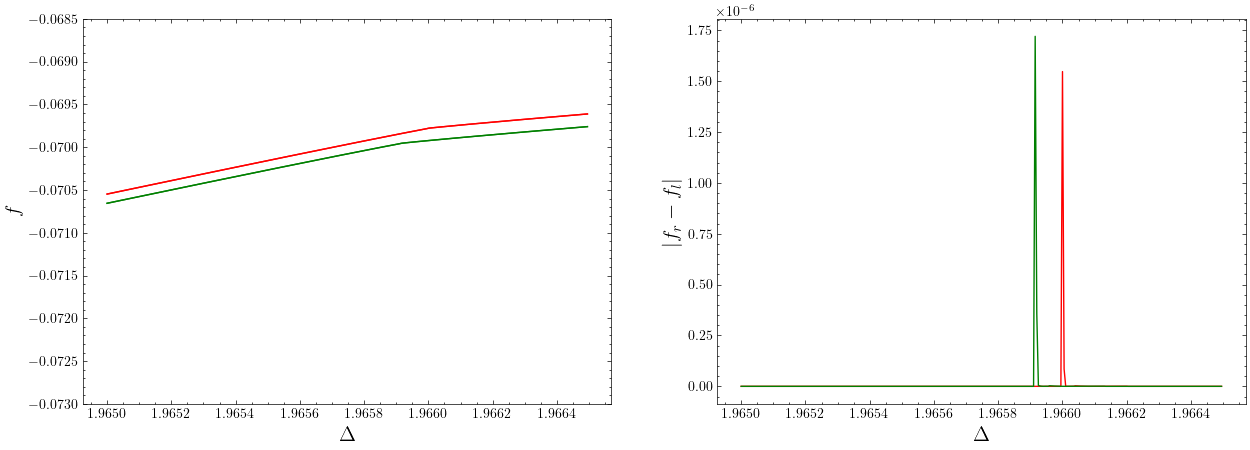

In [252]:
T_range = [0.6079, 0.6082]
colors = ["r", "g", "b", "k", "y"]
fig, axs = plt.subplots(ncols = 2, figsize=(15, 5))
delta_stars = []

for idx, temp in enumerate(T_range):
    data_inv = read('28-06 12:04', f"temperature{temp}")
    data = read('28-06 11:46', f"temperature{temp}")
    energies = compute(Prop.f, data)
    energies_inv = compute(Prop.f, data_inv)
    subtracted = [abs(e1 - e2) for e1, e2 in zip(energies, energies_inv[::-1])]
    axs[0].plot(data["couplings"], energies, label=f"T = {round(temp,4)}", color = colors[idx % 5])
    axs[0].plot(data_inv["couplings"], energies_inv, color = colors[idx % 5])
    subtracted_sorted = sorted(subtracted)

    idx1 = subtracted.index(subtracted_sorted[-1])
    idx2 = subtracted.index(subtracted_sorted[-2])

    delta_stars.append((data["couplings"][idx1] + data["couplings"][idx2]) / 2)
    axs[1].plot(data["couplings"], subtracted, label = f"T = {round(temp,4)}",  color = colors[idx % 5])


axs[0].set_xlabel("$\Delta$", fontsize = 15)
axs[0].set_ylim(-0.0730, -0.0685)
axs[0].set_ylabel("$f$", fontsize =15)
axs[1].set_xlabel("$\Delta$", fontsize = 15)
axs[1].set_ylabel(r"$|f_r - f_l|$", fontsize =15)

plt.show()

In [253]:
delta_stars

[1.9660025000000068, 1.965917500000006]

In [254]:
T_range

[0.6079, 0.6082]